In [1]:
library(rockchalk)      
data <- read.csv("D:/Project/R/##example##/心理统计和可视化/All.csv")

In [2]:
#中心化处理  
data$自变量 <- scale(data$RL, center = TRUE, scale = FALSE)[,]     
data$因变量 <- scale(data$HL, center = TRUE, scale = FALSE)[,] 
data$调节变量  <- scale(data$OC, center = TRUE, scale = FALSE)[,]

In [3]:
#模型检验
model = lm(因变量 ~ 自变量 + 调节变量 + 自变量*调节变量)   
summary(model)

ERROR: Error in eval(predvars, data, env): object '因变量' not found


In [ ]:
library(interactions)
library(jtools)
#简单斜率分析
sim_slopes(model, pred = 自变量, modx = 调节变量,johnson_neyman = F)

SIMPLE SLOPES ANALYSIS 

Slope of 自变量 when 调节变量 = -9.350051e-01 (- 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.25   0.05     4.99   0.00

Slope of 自变量 when 调节变量 =  3.582130e-18 (Mean): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.33   0.05     6.23   0.00

Slope of 自变量 when 调节变量 =  9.350051e-01 (+ 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.41   0.06     6.51   0.00


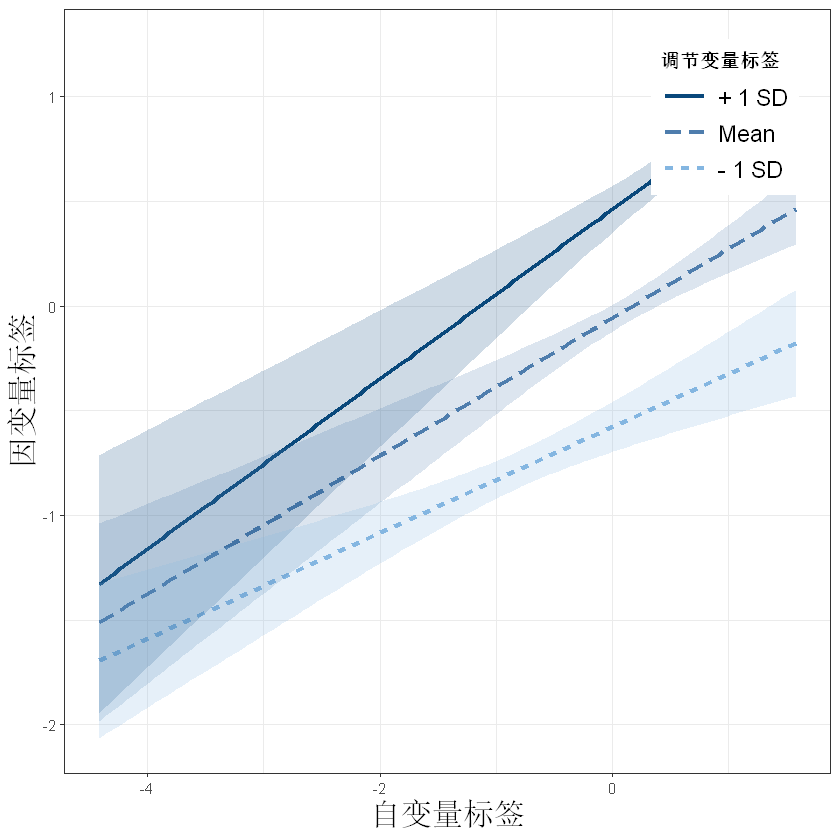

In [ ]:
#绘图，方法一，还算好看
interact_plot(model, pred = 自变量, modx =调节变量,                                               
              plot.points = F,                                            
              x.label="自变量标签",                                            
              y.label="因变量标签",                                            
              legend.main="调节变量标签",interval = T,
              int.type ="confidence",point.size = 1.5,line.thickness=1.2 )+
              theme_apa(legend.pos="topright",legend.use.title =T,
              legend.font.size = 14, x.font.size = 18, y.font.size = 18,
              remove.y.gridlines =F,
              remove.x.gridlines = F) 

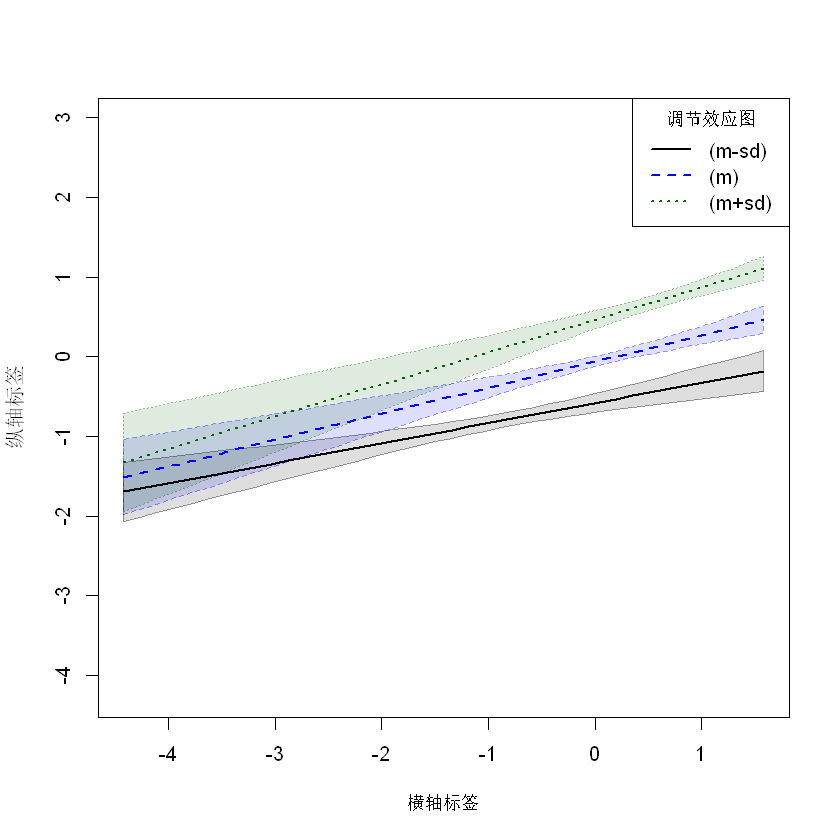

In [ ]:
#绘图，方法2，这个方法太丑了
plotSlopes(model, plotx = 自变量, modx = 调节变量, xlab = 
             "横轴标签", ylab = "纵轴标签",modxVals="std.dev",interval = "confidence", 
           lty = c(1, 2,3),legendArgs = list(x = "topright", title = "调节效应图"),plotPoints 
           = FALSE)